In [69]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm 

In [70]:
class Planeta:
    
    def __init__(self, e, a, t):
        
        self.t = t
        self.dt = t[1] - t[0] # Paso del tiempo
        
        self.e = e # Excentricidad
        self.a_ = a # Semi-eje mayor au
        
        self.G = 4*np.pi**2 # Unidades gaussianas
        
        self.r = np.zeros(3)
        self.v = np.zeros_like(self.r)
        self.a = np.zeros_like(self.r)
        
        self.r[0] = self.a_*(1-self.e)
        self.v[1] = np.sqrt( self.G*(1+self.e)/(self.a_*(1.-self.e)) )
        
        self.R = np.zeros((len(t),len(self.r)))
        self.V = np.zeros_like(self.R)
        
        # El valor del pasado
        self.rp = self.r
        
    def GetAceleration(self):
        
        d = np.linalg.norm(self.r)
        self.a = -self.G/d**3*self.r
        
        
    def Evolution(self,i):
        
        self.SetPosition(i)
        self.SetVelocity(i)
        self.GetAceleration()
        
        if i==0:
            self.r = self.rp + self.v*self.dt
        else:
            
            # rp pasado, r presente rf futuro
            self.rf = 2*self.r - self.rp + self.a*self.dt**2
            self.v = (self.rf - self.rp)/(2*self.dt)
            
            self.rp = self.r
            self.r = self.rf
    
    def SetPosition(self,i):
        self.R[i] = self.r
        
    def SetVelocity(self,i):
        self.V[i] = self.v
    
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
    
    def GetPerihelio(self):
        
        Dist = np.linalg.norm(self.R,axis=1)
        
        timeup = []
        
        for i in range(1,len(Dist)-1):
            if Dist[i] < Dist[i-1] and Dist[i] < Dist[i+1]:
                timeup.append(self.t[i])
            
        return timeup

In [71]:
#a

def GetPlanetas(t):
    
    Mercurio = Planeta(0.2056,0.307,t)
    Venus = Planeta(0.0067,0.7233,t)
    Tierra = Planeta(0.01671,1.,t)
    Marte = Planeta (0.0934,1.52400,t)
    Jupiter = Planeta (0.0483,5.20440,t)
    
  
    return [Mercurio,Venus,Tierra, Marte,Jupiter]

In [72]:
dt = 0.001
tmax = 60
t = np.arange(0.,tmax,dt)
Planetas = GetPlanetas(t)

In [73]:
def RunSimulation(t,Planetas):
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        #print(it)
        for i in range(len(Planetas)):
            Planetas[i].Evolution(it)
            # Aca debes agregar la interaccion con la pared
            
            
    return Planetas

In [74]:
Planetas = RunSimulation(t,Planetas)

Running simulation: 100%|██████████| 60000/60000 [00:05<00:00, 11399.13 Steps/s]


In [75]:
#b Periodo orbital para cada planeta en años terrestres

i = 0
listap= []
    
for i in [0,1,2,3,4]:
    peri=Planetas[i].GetPerihelio()
        
    sol = peri[1]-peri[0]

    listap.append(sol)

    i+=1
        
listap

[0.17, 0.615, 1.0010000000000001, 1.881, 11.872]

In [126]:
def Semiejemayor3(t):
    
    p = GetPlanetas(t)
    s = np.zeros(len(p))
    
    for i, p in enumerate(p):
        s[i] = p.a_**3
    
    return s

Semiejemayor3(t)


array([2.89344430e-02, 3.78403718e-01, 1.00000000e+00, 3.53960582e+00,
       1.40965230e+02])

In [127]:
#c graficat T^2 y a^3
listaT2 = []
for i in range(len(listap)):
    listaT2.append(listap[i]**2)


arrayT2 = np.array(listaT2)

arrayT2


array([2.89000000e-02, 3.78225000e-01, 1.00200100e+00, 3.53816100e+00,
       1.40944384e+02])

<IPython.core.display.Javascript object>


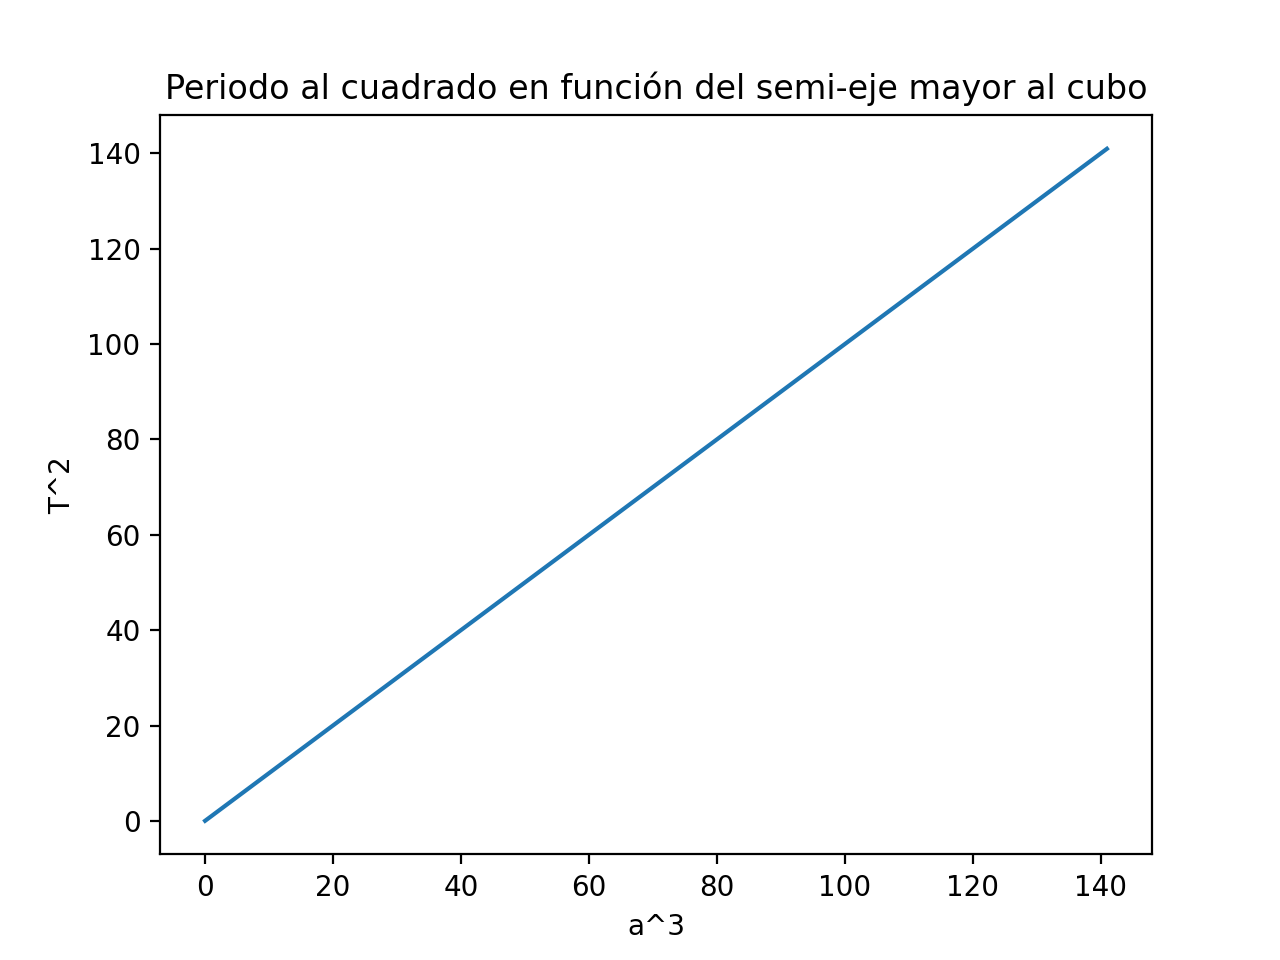

In [129]:
x = arrayT2
y = Semiejemayor3(t)


plt.plot(x, y)


plt.xlabel('a^3')
plt.ylabel('T^2')
plt.title('Periodo al cuadrado en función del semi-eje mayor al cubo')

plt.show()

<IPython.core.display.Javascript object>


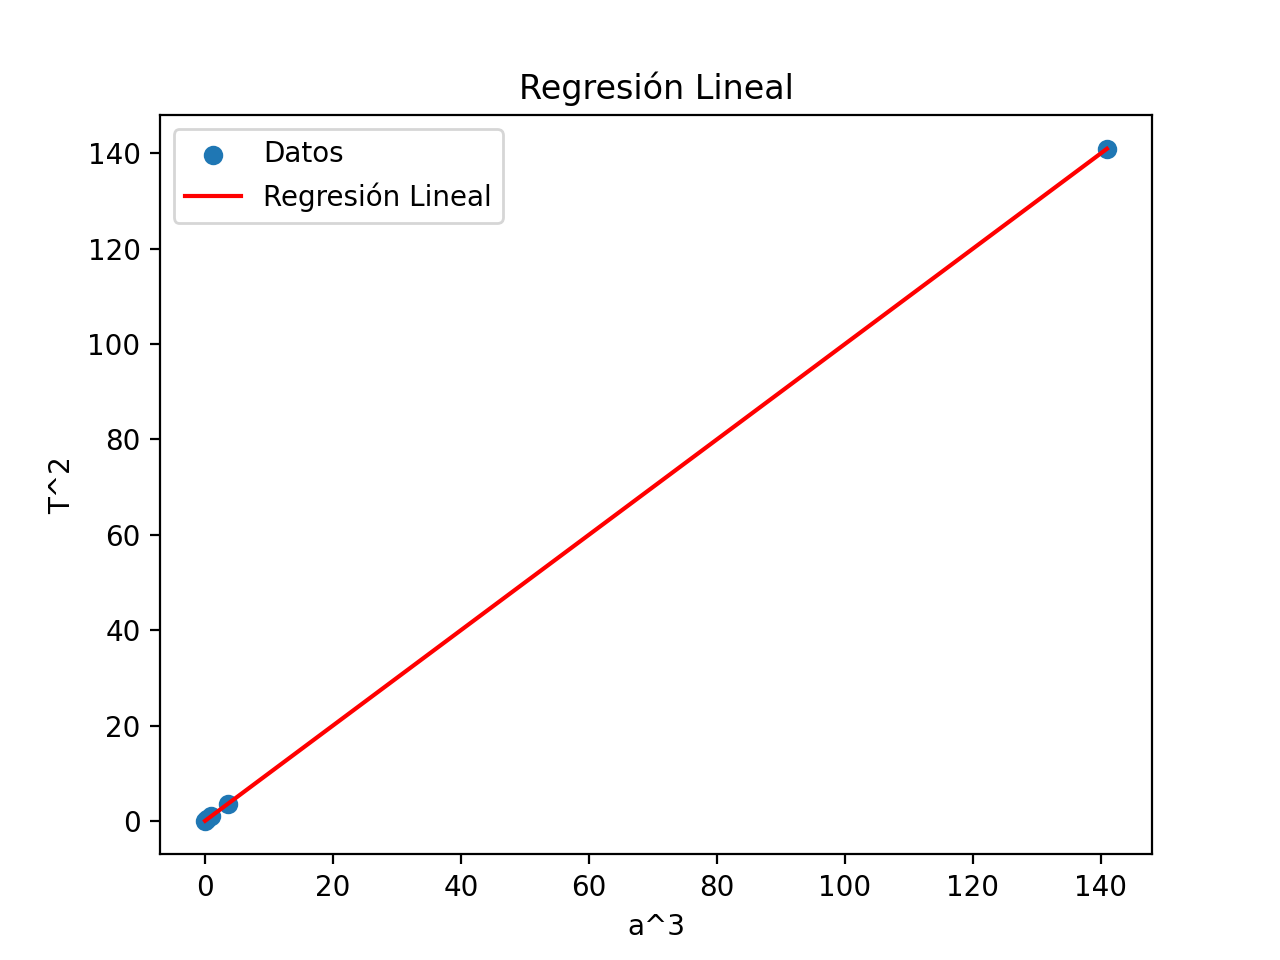

In [135]:
#d 

from sklearn.linear_model import LinearRegression

x = arrayT2
y = Semiejemayor(t)

X = x.reshape(-1, 1)

model = LinearRegression()


model.fit(X, y)


pendiente = model.coef_[0]

punto_de_corte = model.intercept_

y_pred = model.predict(X)


plt.scatter(x, y, label='Datos')
plt.plot(x, y_pred, color='red', label='Regresión Lineal')
plt.xlabel('a^3')
plt.ylabel('T^2')
plt.title('Regresión Lineal')
plt.legend()
plt.show()


In [97]:
#e Con el valor de la pendiente, reporte la masa del sol en unidades gausiana y en el sistema internacional SI.

In [131]:
pendiente # en años cuadrados y Au cubicos

1.0001499842593389

In [136]:
m=(pendiente/3.348e+33)* 9.95839577e+14 #pasar de años^2 a segundos^2 y de au^3 a m^3
m


2.9748773514378034e-19

In [137]:
punto_de_corte

-0.0002756735395337273

In [138]:
masa_sol = (4*np.pi**2)/ (m*6.674e-11)
masa_sol

1.988403271936422e+30

In [139]:
masa_sol*1000 #unidades gaussianas aka en gramos

1.988403271936422e+33

In [ ]:
#a
#excenticidades:

mercurio_ex = 0.2056
venus_ex = 0.0068
tierra_ex = 0.0167
marte_ex = 0.0934
jupiter_ex =0.0483

#fuente :https://www.windows2universe.org/our_solar_system/planets_table.html&lang=sp#:~:text=La%20excentricidad%20(e)%20es%20un,deben%20tener%20%C3%B3rbitas%20casi%20circulares.


#semi-ejes mayores:

mercurio_sem = 0.38700
venus_sem = 0.72300
tierra_sem = 1.00000
marte_sem = 1.52400
jupiter_sem = 5.20440

#fuente: https://es.wikipedia.org/wiki/Semieje_mayor
